## Análisis de datos - Clase 2

### Medidas estadísticas descriptivas 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### 1. Tendencia central (media, mediana y moda)

In [88]:
# Cargamos el dataset de Titanic viene incluido en la biblioteca Seaborn
titanic_df = sns.load_dataset('titanic') # sns.load_dataset Devuelve un Pandas DF
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [89]:
print(f"Valores faltantes: \n{titanic_df.isnull().sum()}") 

Valores faltantes: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [90]:
# Creamos un dataset reducido, con la edad del pasajero, el costo del pasaje 
# y una columna (sibsp) que indica cuántos de sus familiares (hermanos o esposo/a) 
# habían a bordo.

df = titanic_df[['age', 'fare', 'sibsp']].dropna() # Eliminamos los datos nulos con dropna()

df.head()

,age,fare,sibsp
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [91]:
st.mode(df['age'])

ModeResult(mode=np.float64(24.0), count=np.int64(30))

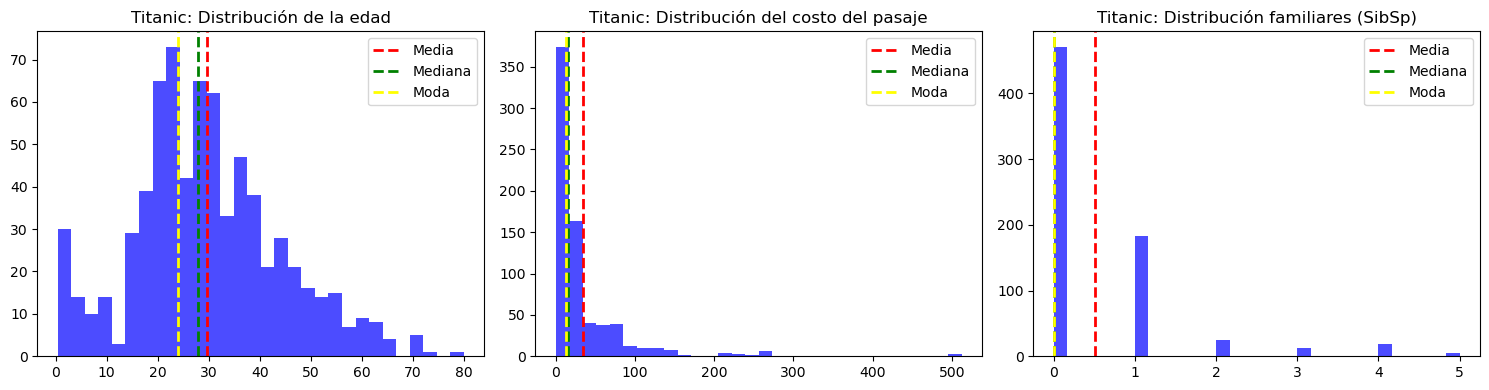

In [ ]:
# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7, color='blue') # dibujar histograma
    ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.axvline(st.mode(data)[0], color='yellow', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda. St.mode() devuelve (moda, count)
    ax.set_title(title)
    ax.legend()

plot_distribution(axes[0], df['age'], 'Titanic: Distribución de la edad')
plot_distribution(axes[1], df['fare'], 'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], df['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

### ¿Qué métrica representa mejor cada variable?

### 2. Varianza, desviación estándar, cuartiles y rango intercuartil

### 3. Skewness y curtosis

### 4. Estadística descriptiva completa

In [93]:
print("Estadística descriptiva del dataset:\n", df.describe())

# (El percentil 50% es equivalente a la mediana)

Estadística descriptiva del dataset:
               age        fare       sibsp
count  714.000000  714.000000  714.000000
mean    29.699118   34.694514    0.512605
std     14.526497   52.918930    0.929783
min      0.420000    0.000000    0.000000
25%     20.125000    8.050000    0.000000
50%     28.000000   15.741700    0.000000
75%     38.000000   33.375000    1.000000
max     80.000000  512.329200    5.000000
